# 一个基本的图像分类器 Fashion MNIST
https://www.tensorflow.org/tutorials/keras/basic_classification

In [1]:
# 仅使用1号GPU 参考 https://github.com/keras-team/keras/issues/6031
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
# 仅使用需要的显存
import tensorflow as tf
from tensorflow.keras import backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

/home/liaocy/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 包含70，000张灰度图片，有10个分类。这些照片用$28*28$低解析度展示服装样式。

In [18]:
# 下载 Fashion MNIST数据集，和MNIST的大小和数量都是一样的
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(train_images.shape, test_images.shape)

((60000, 28, 28), (10000, 28, 28))

In [7]:
#设定分类id从0到9分别对应的服饰名称
class_names = ['T恤', '裤子', '套衫', '连衣裙', '外套', 
               '凉鞋', '衬衫', '运动鞋', '包', '踝靴']

In [8]:
#展示一下数据，我们可以看到测试数据里有60,000张照片，每张28像素x28像素
train_images.shape

(60000, 28, 28)

In [9]:
# 相应的，有60,000个标签
len(train_labels)

60000

In [10]:
# 这些标签都是0-9的整数
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## 预处理图像
在训练网络之前，我们需要预处理图像。

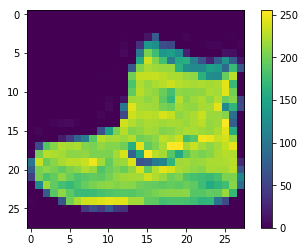

9 踝靴


In [15]:
#我们显示第一张图片，会发现每个值都在0-255（灰度）之间，这是一双鞋子(踝靴)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(train_labels[0], class_names[train_labels[0]])

In [19]:
# 在输入网络之前，我们将这些值归一化到0-1之间。我们让每个值除以255，这样一来这些值从整数变为浮点数
train_images = train_images / 255.0
test_images = test_images / 255.0

0.0

In [23]:
# 让matplotlib能够显示中文，将字体文件装入font
import matplotlib.font_manager as fm
font = fm.FontProperties(fname='simsun.ttc')

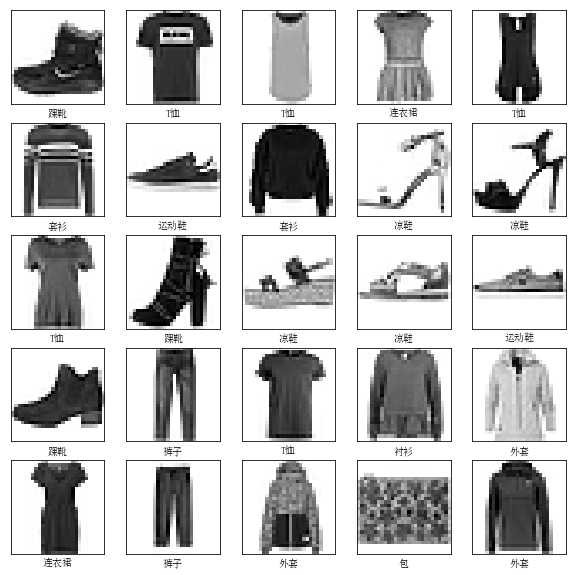

In [27]:
# 我们显示前25个训练图片和各自标签，确认这些数据是正确的
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # 显示中文需要调用字体文件
    plt.xlabel(class_names[train_labels[i]], fontproperties=font)